In [ ]:
#Q2:  When should I visit Seattle? The listing availabilities by months.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_calendar = pd.read_csv('/Users/wiz/Downloads/archive/calendar.csv')

In [20]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [21]:
df_calendar['month']=pd.to_datetime(df_calendar['date']).dt.month
df_calendar['year']=pd.to_datetime(df_calendar['date']).dt.year

In [22]:
# combine month and year to a column 
df_calendar['MonthYear'] = pd.to_datetime(df_calendar[['year', 'month']].assign(Day=1))

In [23]:
# this shows every month has the same number of listings
month_listing=df_calendar.groupby(['MonthYear'])["listing_id"].nunique()

In [24]:
month_listing=month_listing.to_frame().reset_index()

Text(0.5,1,'Number of unique listings by month')

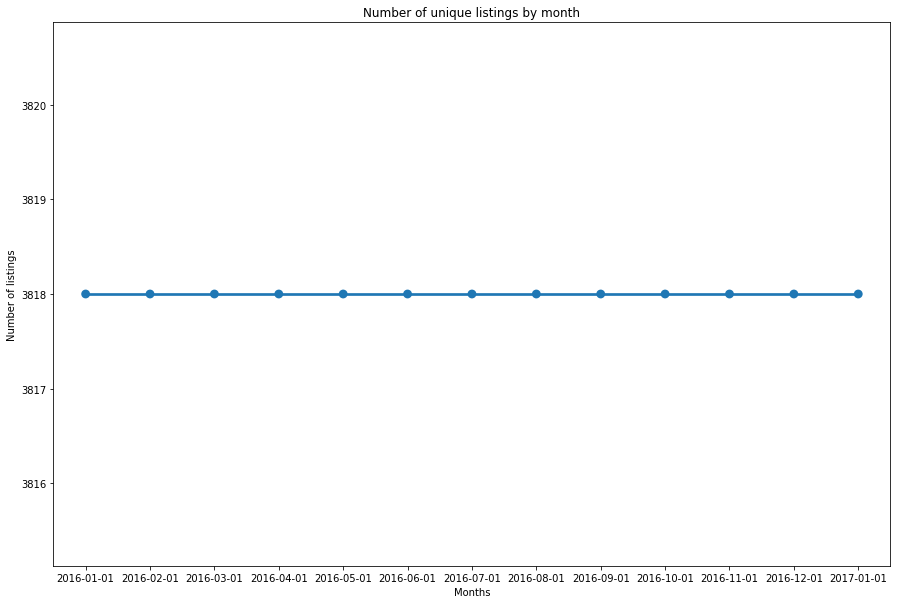

In [25]:
#every month has the same number of listing 
count = df_calendar.groupby(['MonthYear'])["listing_id"].nunique()

plt.subplots(figsize = (15,10))
ax = sns.pointplot(data=month_listing,x=month_listing['MonthYear'].astype(str),y=month_listing['listing_id'])
plt.ylabel('Number of listings')
plt.xlabel('Months')
plt.title('Number of unique listings by month')

In [21]:
# what is the id in each month 
df_calendar[(df_calendar['listing_id'] ==241032)].groupby(["MonthYear"]).count()

,listing_id,date,available,price,month,year
MonthYear,,,,,,
2016-01-01,28,28,28,12,28,28
2016-02-01,29,29,29,26,29,29
2016-03-01,31,31,31,31,31,31
2016-04-01,30,30,30,30,30,30
2016-05-01,31,31,31,31,31,31
2016-06-01,30,30,30,30,30,30
2016-07-01,31,31,31,31,31,31
2016-08-01,31,31,31,31,31,31
2016-09-01,30,30,30,30,30,30


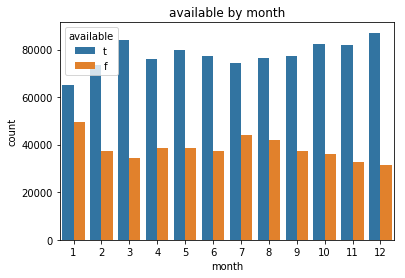

In [26]:
# dispay every month available count 
sns.countplot(data = df_calendar, x = df_calendar['month'], hue = 'available');
plt.title('available by month');

In [10]:
# dispay every month available count ratio 
# which month has higher unavailable ratio 
ratio_month=df_calendar.loc[df_calendar['available'] =='f'].groupby(["MonthYear"])["listing_id"].count()/df_calendar.groupby(["MonthYear"])["listing_id"].count()

In [11]:
# I create a ratio_month list to plot 
ratio_month=ratio_month.to_frame().reset_index()

Text(0.5,1,'Ratio per Month')

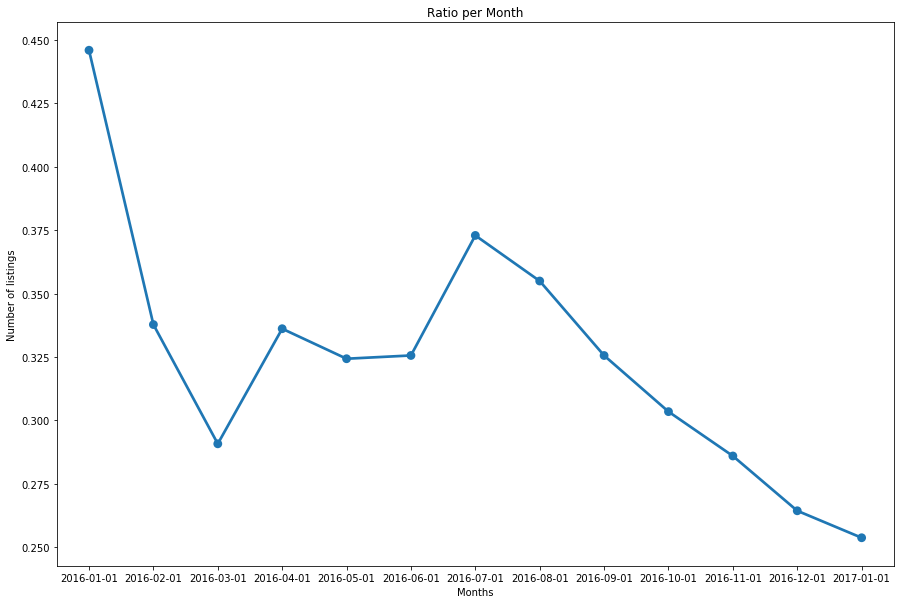

In [17]:
plt.subplots(figsize = (15,10))
ax = sns.pointplot(data=ratio_month,x=ratio_month['month'].astype(str),y=ratio_month['listing_id'])
plt.ylabel('Number of listings')
plt.xlabel('Months')
plt.title('Ratio per Month')

## The above ratio looks a bit odd in 2016–01 and 2017–01 when look deeper, 
## I found the data in these two months is not for full month. 
## So I decided to combine the data in two month into one month.


In [33]:
# group 2016-01 and 2017-01
ratio_each_month=df_calendar.loc[df_calendar['available'] =='f'].groupby(['month'])["listing_id"].count()/df_calendar.groupby(['month'])["listing_id"].count()

In [34]:
ratio_each_month=ratio_each_month.to_frame()

Text(0.5,1,'Ratio per Month')

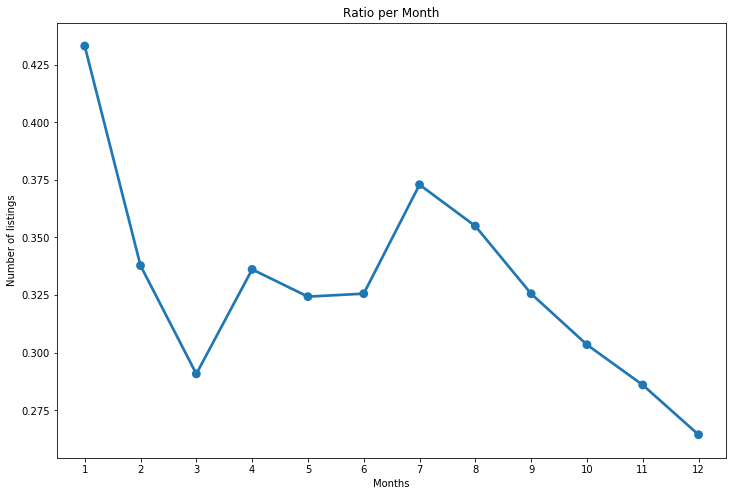

In [36]:
plt.subplots(figsize = (12,8))
ax = sns.pointplot(data=ratio_each_month,x=ratio_each_month.index,y=ratio_each_month['listing_id'])
plt.ylabel('Number of listings')
plt.xlabel('Months')
plt.title('Ratio per Month')

In [41]:
ratio_month=df_calendar.loc[df_calendar['available'] =='f'].groupby(["month"])["listing_id"].count()/df_calendar.groupby(["month"])["listing_id"].count()

In [43]:
ratio_month=ratio_month.to_frame()

In [44]:
ratio_month

,listing_id
month,
1,0.433063
2,0.337792
3,0.290813
4,0.336153
5,0.324330
6,0.325616
7,0.372903
8,0.354949
9,0.325598


In [46]:
df_calendar.head()

,listing_id,date,available,price,month,year,MonthYear
0,241032,2016-01-04,t,$85.00,1,2016,2016-01-01
1,241032,2016-01-05,t,$85.00,1,2016,2016-01-01
2,241032,2016-01-06,f,NaN,1,2016,2016-01-01
3,241032,2016-01-07,f,NaN,1,2016,2016-01-01
4,241032,2016-01-08,f,NaN,1,2016,2016-01-01


In [47]:
#drop the Nan Price to compare
df_calendar1=df_calendar.dropna(subset = ["price"])

In [48]:
#remove extra_people$
price=df_calendar1['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)
    
df_calendar1['price']=prices

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [49]:
# price mean per month 
df_calendar1.head()

,listing_id,date,available,price,month,year,MonthYear
0,241032,2016-01-04,t,85.0,1,2016,2016-01-01
1,241032,2016-01-05,t,85.0,1,2016,2016-01-01
9,241032,2016-01-13,t,85.0,1,2016,2016-01-01
10,241032,2016-01-14,t,85.0,1,2016,2016-01-01
14,241032,2016-01-18,t,85.0,1,2016,2016-01-01


In [54]:
price_permonth=df_calendar1.groupby(["month"])["price"].mean()

In [55]:
price_permonth=price_permonth.to_frame()

In [61]:
df_calendar1.groupby(["month"])["price"].sum()

month
1      7981548.0
2      9113355.0
3     10798161.0
4     10272371.0
5     11159008.0
6     11391415.0
7     11288732.0
8     11502179.0
9     11065949.0
10    11296639.0
11    11096625.0
12    11949282.0
Name: price, dtype: float64

In [59]:
df_calendar1.groupby(["month"])["price"].count()

month
1     64937
2     73321
3     83938
4     76037
5     79971
6     77244
7     74222
8     76347
9     77246
10    82438
11    81780
12    87061
Name: price, dtype: int64

Text(0.5,1,'mean for each month')

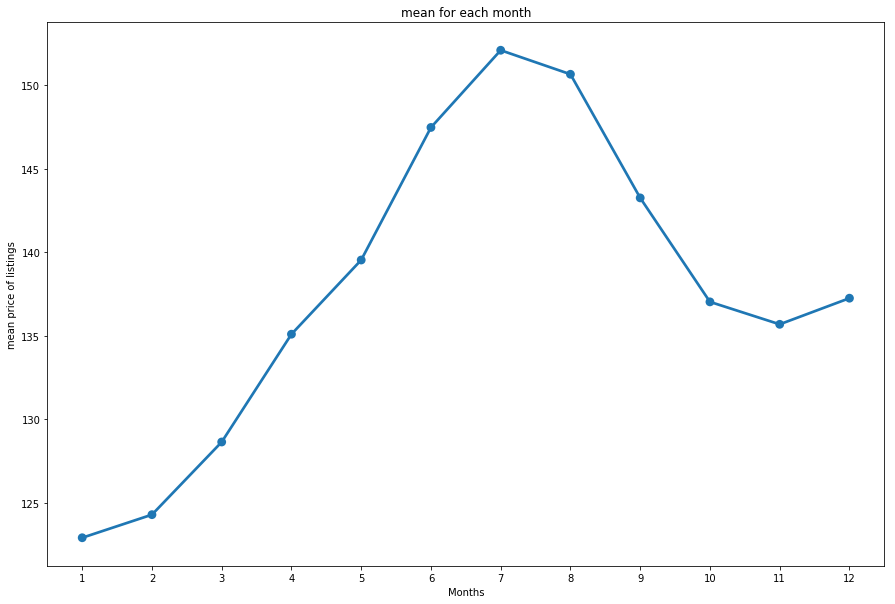

In [57]:
plt.subplots(figsize = (15,10))
ax = sns.pointplot(data=price_permonth,x=price_permonth.index,y=price_permonth['price'])
plt.ylabel('mean price of listings')
plt.xlabel('Months')
plt.title('Mean for Each Month')